⚙️ 重新从 .mat 文件生成数据
训练集大小: (4939, 256, 1) (4939,)
验证集大小: (1235, 256, 1) (1235,)
跨工况测试集大小(3hp): (6186, 256, 1) (6186,)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 256, 16)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 128, 16)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 128, 32)             │           2,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 64, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 64, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 32, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,490 (1.04 MB)

 Trainable params: 272,490 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3483 - loss: 1.8402 - val_accuracy: 0.7328 - val_loss: 0.7384 - learning_rate: 0.0010
Epoch 2/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7298 - loss: 0.7524 - val_accuracy: 0.8202 - val_loss: 0.5046 - learning_rate: 0.0010
Epoch 3/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8222 - loss: 0.4890 - val_accuracy: 0.9401 - val_loss: 0.2362 - learning_rate: 0.0010
Epoch 4/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8993 - loss: 0.3017 - val_accuracy: 0.9547 - val_loss: 0.1843 - learning_rate: 0.0010
Epoch 5/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9418 - loss: 0.1982 - val_accuracy: 0.9765 - val_loss: 0.0910 - learning_rate: 0.0010
Epoch 6/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9531 - loss: 0.1350 - val_accuracy: 0.9773 - val_loss: 0.0783 - learning_rate: 0.0010
Epoch 7/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9635 - loss: 0.1106 - val_acc

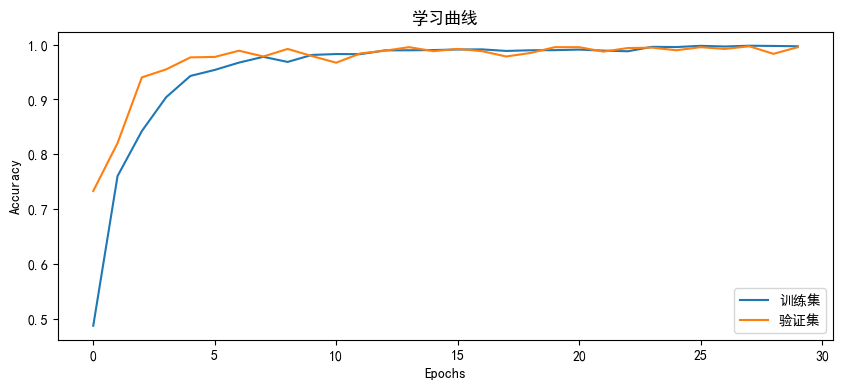

194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


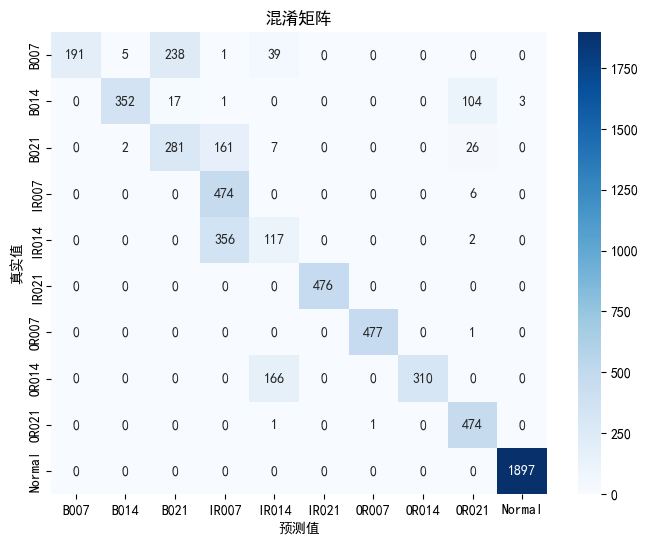

              precision    recall  f1-score   support

        B007       1.00      0.40      0.57       474
        B014       0.98      0.74      0.84       477
        B021       0.52      0.59      0.55       477
       IR007       0.48      0.99      0.64       480
       IR014       0.35      0.25      0.29       475
       IR021       1.00      1.00      1.00       476
       OR007       1.00      1.00      1.00       478
       OR014       1.00      0.65      0.79       476
       OR021       0.77      1.00      0.87       476
      Normal       1.00      1.00      1.00      1897

    accuracy                           0.82      6186
   macro avg       0.81      0.76      0.76      6186
weighted avg       0.85      0.82      0.81      6186



In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 或 'Microsoft YaHei'
matplotlib.rcParams['axes.unicode_minus'] = False   # 解决负号显示问题

# ===============================
# 1. 文件路径配置（2hp用于训练/验证，3hp用于测试）
# ===============================
file_paths_2hp = [
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.007/B007_2.mat",   # B007
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.014/B014_2.mat",   # B014
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.021/B021_2.mat",   # B021
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.007/IR007_2.mat",  # IR007
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.014/IR014_2.mat",  # IR014
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.021/IR021_2.mat",  # IR021
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.007/OR007@6_2.mat",# OR007
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.014/OR014@6_2.mat",# OR014
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.021/OR021@6_2.mat",# OR021
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/Normal Baseline Data/Normal_2.mat"                     # Normal
]
file_paths_3hp = [
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.007/B007_3.mat",   # B007
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.014/B014_3.mat",   # B014
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.021/B021_3.mat",   # B021
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.007/IR007_3.mat",  # IR007
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.014/IR014_3.mat",  # IR014
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.021/IR021_3.mat",  # IR021
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.007/OR007@6_3.mat",# OR007
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.014/OR014@6_3.mat",# OR014
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.021/OR021@6_3.mat",# OR021
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/Normal Baseline Data/Normal_3.mat"                     # Normal
]
labels = list(range(10))

segment_length = 256
val_size  = 0.2
overlap   = 0.0

# 保存目录
save_dir = r"D:\study\code\Model Training\1D-CNN\Diff Working Conditions\2hp to 3hp"

# ===============================
# 2. 数据预处理函数
# ===============================
def load_and_segment_data(file_paths, labels, segment_length, overlap):
    X, y = [], []
    step = int(segment_length * (1 - overlap))  # 步长
    for file, label in zip(file_paths, labels):
        mat_dict = loadmat(file)
        key = [k for k in mat_dict.keys() if "DE_time" in k][0]   # 驱动端数据
        signal = mat_dict[key].squeeze()

        segments = []
        for start in range(0, len(signal) - segment_length + 1, step):
            seg = signal[start:start + segment_length]
            segments.append(seg)
        segments = np.array(segments)

        X.append(segments)
        y.extend([label] * len(segments))

    X = np.vstack(X)
    y = np.array(y)
    return X, y

# ===============================
# 3. 数据加载
# ===============================
save_files = [os.path.join(save_dir, f) for f in [
    "X_train_2to3.npy","y_train_2to3.npy",
    "X_val_2to3.npy","y_val_2to3.npy",
    "X_test_2to3.npy","y_test_2to3.npy"
]]

if all(os.path.exists(f) for f in save_files):
    print("✅ 发现已有预处理数据，直接加载")
    X_train = np.load(os.path.join(save_dir, "X_train_2to3.npy"))
    y_train = np.load(os.path.join(save_dir, "y_train_2to3.npy"))
    X_val   = np.load(os.path.join(save_dir, "X_val_2to3.npy"))
    y_val   = np.load(os.path.join(save_dir, "y_val_2to3.npy"))
    X_test  = np.load(os.path.join(save_dir, "X_test_2to3.npy"))
    y_test  = np.load(os.path.join(save_dir, "y_test_2to3.npy"))
else:
    print("⚙️ 重新从 .mat 文件生成数据")
    # 2hp -> train/val；3hp -> test
    X2, y2 = load_and_segment_data(file_paths_2hp, labels, segment_length, overlap)
    X3, y3 = load_and_segment_data(file_paths_3hp, labels, segment_length, overlap)
    
    # 2hp 内部划分 train/val
    X_train_full, X_val, y_train_full, y_val = train_test_split(
        X2, y2, test_size=val_size, stratify=y2, random_state=42
    )
    
    # 归一化：只用 2hp 的训练集统计量
    mean, std = np.mean(X_train_full), np.std(X_train_full)
    X_train = ((X_train_full - mean) / std)[..., np.newaxis]
    X_val   = ((X_val       - mean) / std)[..., np.newaxis]
    X_test  = ((X3          - mean) / std)[..., np.newaxis]   # 注意：3hp 也用 2hp 的统计量
    
    y_train, y_test = y_train_full, y3

    # 保存
    os.makedirs(save_dir, exist_ok=True)
    np.save(os.path.join(save_dir, "X_train_2to3.npy"), X_train)
    np.save(os.path.join(save_dir, "y_train_2to3.npy"), y_train)
    np.save(os.path.join(save_dir, "X_val_2to3.npy"), X_val)
    np.save(os.path.join(save_dir, "y_val_2to3.npy"), y_val)
    np.save(os.path.join(save_dir, "X_test_2to3.npy"), X_test)
    np.save(os.path.join(save_dir, "y_test_2to3.npy"), y_test)

print("训练集大小:", X_train.shape, y_train.shape)
print("验证集大小:", X_val.shape,   y_val.shape)
print("跨工况测试集大小(3hp):", X_test.shape, y_test.shape)

# ===============================
# 4. 定义 1D-CNN 模型
# ===============================
def build_cnn_1d(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # CNN 堆叠
    x = layers.Conv1D(16, kernel_size=7, padding="same", activation="relu")(inputs)
    x = layers.MaxPooling1D(pool_size=2)(x)

    x = layers.Conv1D(32, kernel_size=5, padding="same", activation="relu")(x)
    x = layers.MaxPooling1D(pool_size=2)(x)

    x = layers.Conv1D(64, kernel_size=3, padding="same", activation="relu")(x)
    x = layers.MaxPooling1D(pool_size=2)(x)

    # 展平 + 全连接分类
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    return models.Model(inputs, outputs)

num_classes = len(np.unique(y_train))
model = build_cnn_1d(input_shape=(segment_length,1), num_classes=num_classes)
model.summary()

# ===============================
# 5. 训练模型
# ===============================
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    ReduceLROnPlateau(factor=0.5, patience=5, verbose=1),
    EarlyStopping(patience=10, restore_best_weights=True, verbose=1)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

# ===============================
# 6. 结果评估
# ===============================
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"测试集准确率: {test_acc:.4f}")

# 学习曲线
plt.figure(figsize=(10,4))
plt.plot(history.history["accuracy"], label="训练集")
plt.plot(history.history["val_accuracy"], label="验证集")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.legend(); plt.title("学习曲线")
plt.show()

# 混淆矩阵及分类报告
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
class_names = ["B007","B014","B021","IR007","IR014","IR021","OR007","OR014","OR021","Normal"]

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("预测值"); plt.ylabel("真实值"); plt.title("混淆矩阵")
plt.show()

print(classification_report(y_test, y_pred, target_names=class_names))
